# 01. Import libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# Define path

path = r'C:\Users\carol\Documents\DA\02 Data Inmersion\06 Advanced Analytics & Dashboard Design\Olist Analysis'

In [4]:
# Import data

df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'units_sold_max_items_1_min_units_3.csv'), index_col = False)

In [5]:
# Check dataset

df.head()

,Unnamed: 0,product_id,units_sold,product_photos_qty,product_name_length,product_description_length,review_score,item_price
0,6,001795ec6f1b187d37335e1c4704762e,9,1,53,274,3.222222,38.900000
1,8,001b72dfd63e9833e8c02742adf472e3,13,3,45,520,3.384615,34.990000
2,10,00210e41887c2a8ef9f791ebc780cc36,7,6,56,3893,4.000000,33.485000
3,11,002159fe700ed3521f46cfcf6e941c76,7,3,55,344,3.428571,202.700000
4,13,00250175f79f584c14ab5cecd80553cd,11,2,53,631,4.454545,75.444545


# 02. Data wrangling

In [6]:
# Drop columns

df = df.drop(columns = ['Unnamed: 0'])

In [7]:
# Check columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8230 entries, 0 to 8229
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  8230 non-null   object 
 1   units_sold                  8230 non-null   int64  
 2   product_photos_qty          8230 non-null   int64  
 3   product_name_length         8230 non-null   int64  
 4   product_description_length  8230 non-null   int64  
 5   review_score                8230 non-null   float64
 6   item_price                  8230 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 450.2+ KB


In [8]:
# Change types for data set

df['product_photos_qty']=df['product_photos_qty'].astype('int64')
df['product_name_length']=df['product_name_length'].astype('int64')
df['product_description_length']=df['product_description_length'].astype('int64')

# 03.Data cleaning

In [9]:
df.columns

Index(['product_id', 'units_sold', 'product_photos_qty', 'product_name_length',
       'product_description_length', 'review_score', 'item_price'],
      dtype='object')

In [10]:
df.shape

(8230, 7)

## Missing values

In [11]:
# Check for missing values

df.isnull().sum()

# No missing values to handle

product_id                    0
units_sold                    0
product_photos_qty            0
product_name_length           0
product_description_length    0
review_score                  0
item_price                    0
dtype: int64

## Duplicates check

In [12]:
dups = df.duplicated()

In [13]:
dups.shape # No dups

(8230,)

## Extreme values checks

C:\Users\carol\AppData\Local\Temp\ipykernel_8504\30145776.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['units_sold'], bins=25) # Shows extreme values


<Axes: xlabel='units_sold', ylabel='Density'>

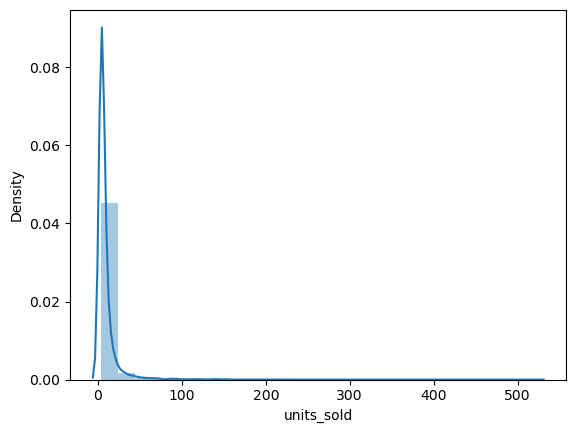

In [14]:
sns.distplot(df['units_sold'], bins=25) # Shows extreme values

# no outliers

In [15]:
df['units_sold'].mean() # Check the mean

9.137910085054678

In [16]:
df['units_sold'].median() # Check the median

5.0

In [17]:
df['units_sold'].max() # Check the max

522

# 04. Data prep for regression analysis

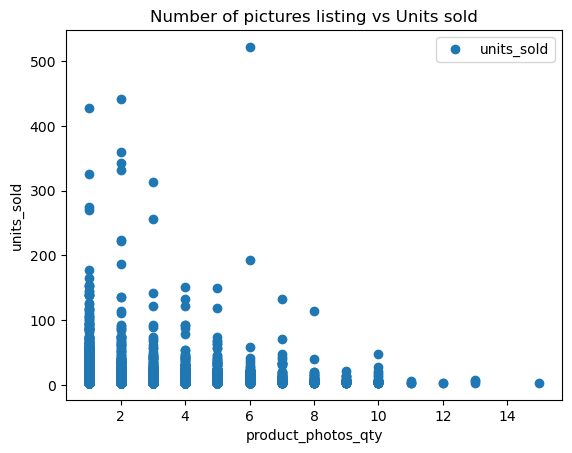

In [18]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'product_photos_qty', y='units_sold',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Number of pictures listing vs Units sold')  
plt.xlabel('product_photos_qty')  
plt.ylabel('units_sold')  
plt.show()

In [19]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['product_photos_qty'].values.reshape(-1,1)
y = df['units_sold'].values.reshape(-1,1)

In [20]:
X

array([[1],
       [3],
       [6],
       ...,
       [1],
       [3],
       [5]], dtype=int64)

In [21]:
y

array([[ 9],
       [13],
       [ 7],
       ...,
       [ 5],
       [ 8],
       [ 5]], dtype=int64)

In [22]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 05. Regression analysis

### Hypothesis: Listings with 5 or more pictures would have a higher volume of sales

In [23]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [24]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [25]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

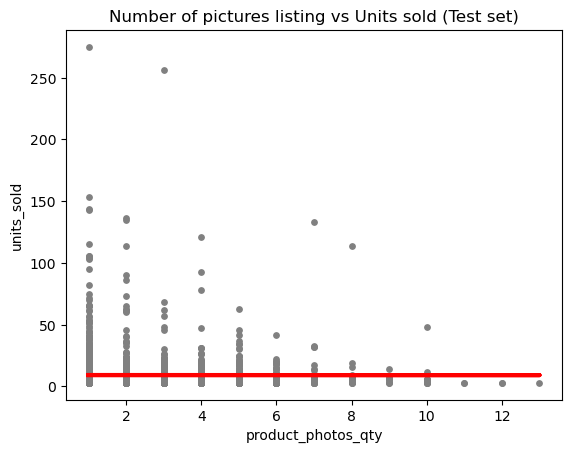

In [26]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Number of pictures listing vs Units sold (Test set)')
plot_test.xlabel('product_photos_qty')
plot_test.ylabel('units_sold')
plot_test.show()

### The linear model represented by the red regression line doesn’t perfectly cover all of the data points. For instance, a listings with one picture have sold the most items, which contradicts the hypothesis.

In [27]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [28]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.00496561]]
Mean squared error:  223.1783417116855
R2 score:  -0.0006689618495523408


### Slope: the slope shows there's a weak negative relationship between variables. The red line is almost flat, which indicates that unit sales don't increase when the number of product pictures changes.
### MSE: the root mean squared error is large, indicating that the data points are far away from the regression line.  It’s safe to say that a regression may not be the best model to represent this data and can’t accurately predict the influence of the number of product pictures on the units sold.
### R2 score: the -0.067% score indicates that the model is not a great fit.

In [29]:
y_predicted

array([[9.2597293 ],
       [9.25476369],
       [9.24979808],
       ...,
       [9.2597293 ],
       [9.2597293 ],
       [9.2597293 ]])

In [30]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,18,9.259729
1,7,9.254764
2,8,9.249798
3,3,9.259729
4,106,9.259729
5,9,9.249798
6,3,9.254764
7,3,9.244832
8,3,9.254764
9,86,9.254764


## Compare how the regression fits the training set

In [31]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [32]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [33]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.00496561]]
Mean squared error:  400.8686107281076
R2 score:  1.824530591054696e-07


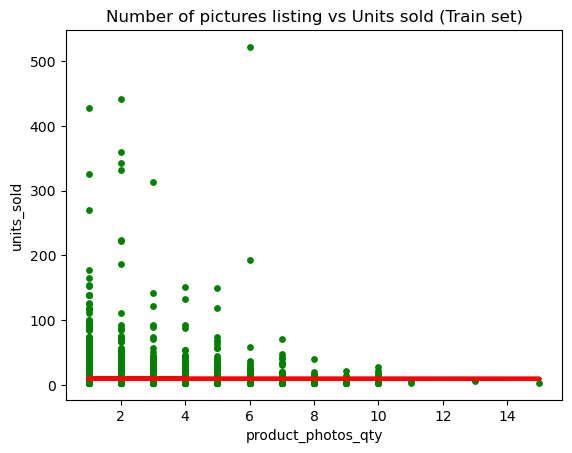

In [34]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Number of pictures listing vs Units sold (Train set)')
plot_test.xlabel('product_photos_qty')
plot_test.ylabel('units_sold')
plot_test.show()